<a href="https://colab.research.google.com/github/nonbiblicaleve/banking-behavioral-segmentation/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

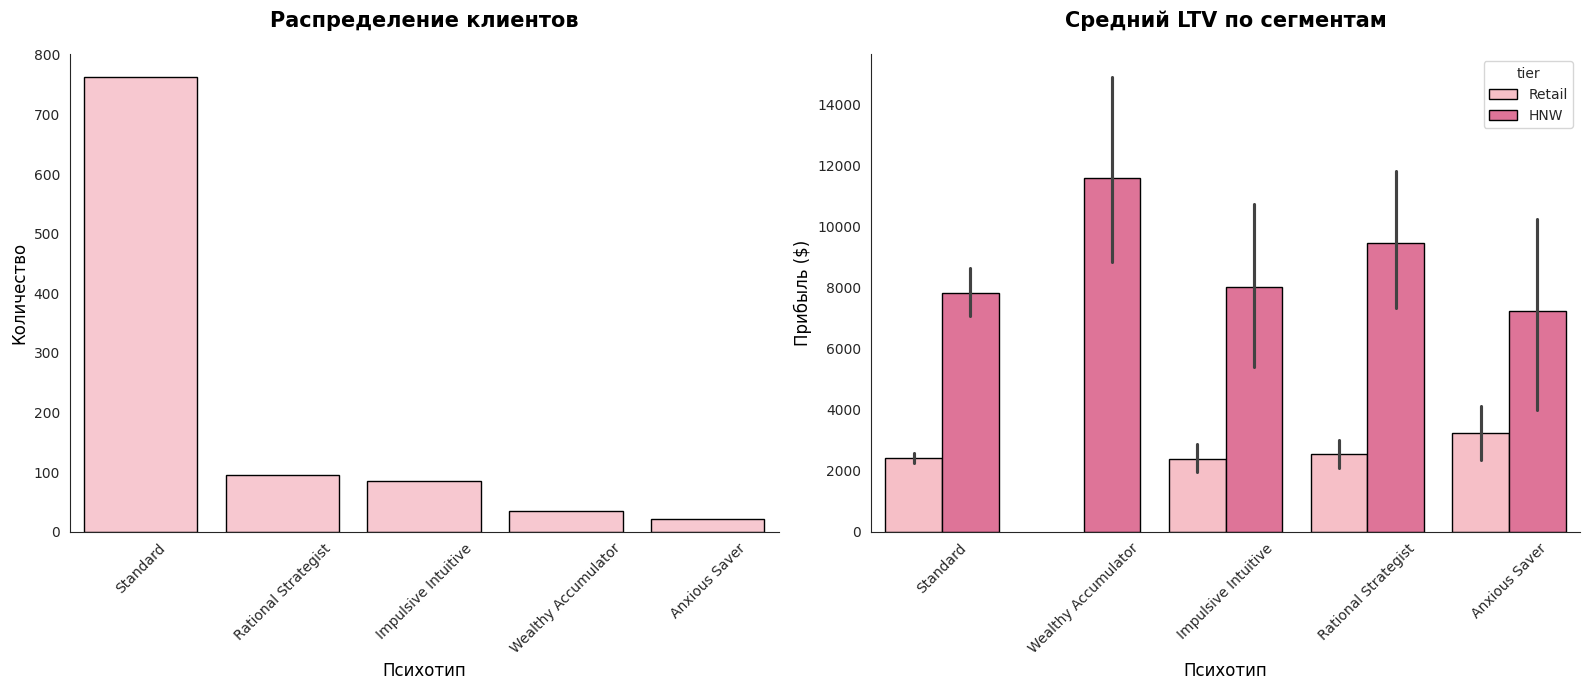

Обнаружено 'Биполярных вкладчиков': 85


In [12]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# генерация данных
np.random.seed(42)
n = 1000
data = {
    'CUST_ID': [f'USER_{i}' for i in range(n)],
    'BALANCE': np.random.exponential(scale=10000, size=n),
    'PURCHASES_FREQUENCY': np.random.uniform(0, 1, size=n),
    'CASH_ADVANCE_TRX': np.random.poisson(lam=5, size=n),
    'PRC_FULL_PAYMENT': np.random.uniform(0, 1, size=n),
    'TENURE': np.random.randint(1, 13, size=n),
    'PURCHASES': np.random.exponential(scale=5000, size=n),
    'risk_appetite': np.random.uniform(0, 1, size=n) # риск для бипоинтуитов
}
df = pd.DataFrame(data)

# SQL
conn = sqlite3.connect(':memory:')
df.to_sql('credit_cards', conn, index=False)

sql_query_updated = """
WITH metrics AS (
    SELECT
        CUST_ID, BALANCE, PURCHASES, risk_appetite,
        (PURCHASES_FREQUENCY + (CASH_ADVANCE_TRX / 20.0)) / 2.0 as neuro_score,
        PRC_FULL_PAYMENT as conscientiousness,
        (BALANCE * 0.05 + PURCHASES * 0.02) as annual_revenue,
        TENURE as years_with_bank
    FROM credit_cards
),
profiling AS (
    SELECT *,
        CASE WHEN BALANCE < 15000 THEN 'Retail' ELSE 'HNW' END as tier,
        CASE
            -- (Биполярная интуиция)
            WHEN risk_appetite > 0.7 AND conscientiousness < 0.3 THEN 'Impulsive Intuitive'

            WHEN neuro_score > 0.6 AND conscientiousness < 0.4 THEN 'Anxious Saver'
            WHEN neuro_score < 0.3 AND conscientiousness > 0.7 THEN 'Rational Strategist'
            WHEN BALANCE > 30000 THEN 'Wealthy Accumulator'
            ELSE 'Standard'
        END as psychotype
    FROM metrics
)
SELECT *,
    CASE
        WHEN psychotype = 'Impulsive Intuitive' THEN 'High-Leverage Trading / Crypto'
        WHEN psychotype = 'Anxious Saver' THEN 'Gold Deposit'
        WHEN psychotype = 'Rational Strategist' AND tier = 'HNW' THEN 'Stock Portfolio'
        WHEN psychotype = 'Wealthy Accumulator' THEN 'Private Banking'
        ELSE 'Standard Savings'
    END as recommendation,
    ROUND(annual_revenue * years_with_bank, 2) as estimated_LTV
FROM profiling;
"""

df_result = pd.read_sql(sql_query_updated, conn)

# ВИЗУАЛ
plt.figure(figsize=(16, 7))

sns.set_style("white")

# График 1: Типажи
plt.subplot(1, 2, 1)
sns.countplot(
    data=df_result,
    x='psychotype',
    color='#FFC0CB',
    edgecolor='black',
    linewidth=1,
    order=df_result['psychotype'].value_counts().index
)
plt.title('Распределение клиентов', fontsize=15, fontweight='bold', color='black', pad=20)
plt.xticks(rotation=45)
plt.xlabel('Психотип', fontsize=12, color='black')
plt.ylabel('Количество', fontsize=12, color='black')

# График 2: Деньги (LTV)
plt.subplot(1, 2, 2)
pink_palette = {'Retail': '#FFB6C1', 'HNW': '#F06292'}

sns.barplot(
    data=df_result,
    x='psychotype',
    y='estimated_LTV',
    hue='tier',
    palette=pink_palette,
    edgecolor='black',
    linewidth=1
)
plt.title('Средний LTV по сегментам', fontsize=15, fontweight='bold', color='black', pad=20)
plt.xticks(rotation=45)
plt.xlabel('Психотип', fontsize=12, color='black')
plt.ylabel('Прибыль ($)', fontsize=12, color='black')

sns.despine()

plt.tight_layout()
plt.show()


# Вывод результатов для проверки
print(f"Обнаружено 'Биполярных вкладчиков': {len(df_result[df_result['psychotype'] == 'Impulsive Intuitive'])}")
df_result.head(20)

report_name = 'banking_segmentation_report.csv'

report_df = df_result[[
    'CUST_ID', 'tier', 'psychotype',
    'recommendation', 'estimated_LTV', 'BALANCE'
]].sort_values(by='estimated_LTV', ascending=False)

report_df.to_csv(report_name, index=False)

In [13]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_result)

https://docs.google.com/spreadsheets/d/14tNSBx4w_dcBC5sENXoGRxNEA5DOk60GqlJP9J-m--I/edit#gid=0


In [14]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=result)

https://docs.google.com/spreadsheets/d/1NijZYUgR2cxTaaYk5y_BPLU-a3S2m6TGW-0pqAecpDc/edit#gid=0
